## Project: Tasks using Pandas and Regex

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g., GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Summary Statistics
* Question 7: Mean
* Question 7: Standard Deviation
* Question 7: InterQuartile Range
* Question 8: BoxPlots
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## In all the functions, remove the 'pass' statement and write your code.

In [1]:
import pandas as pd
import re
import glob
import copy

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [2]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    
    # Get file names
    path =r'../data_raw/'
    filenames = glob.glob(path+"*.xlsx")
    
    return filenames


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['../data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', '../data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', '../data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']


### __Question 2: Write a function to return an excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [3]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    
    # Loop over all files and search for the word "Dictionaries". 
    # Return the filename if theres is a match.
    
    for file in files:
        file_match = re.search(s, file)
        if file_match:
            return file
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

../data_raw\Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [4]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    
    file = Q2_function(files, s)
    df = pd.read_excel(file)
    
    return df


# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
# print(functions_df)
functions_df.head(3)

,State,Started on,Completed,Time taken,Grade/45.00,Q. 1 /5.00,Q. 2 /10.00,Q. 3 /6.00,Q. 4 /6.00,Q. 5 /12.00,Q. 6 /6.00,id
0,Finished,February 5 2018 3:19 PM,February 5 2018 3:34 PM,14 mins 16 secs,32,5,6,6,3.00,12.00,0.00,0
1,Finished,February 4 2018 4:01 PM,February 4 2018 4:19 PM,17 mins 54 secs,31,5,8,6,-,12.00,0.00,1
12,Finished,February 6 2018 3:57 PM,February 6 2018 4:12 PM,15 mins 44 secs,20,3,4,3,-,10.00,0.00,12


### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function)`.

Learn about returning multiple values in Python.

In [6]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    
    # Find names of columns
    names = list(dataframe.columns.values)
    # Subset the DataFrame
    df_subset = dataframe.loc[:,["id", "Time taken", 
                                 "Grade/45.00", 
                                 "Q. 1 /5.00", 
                                 "Q. 2 /10.00", 
                                 "Q. 3 /6.00", 
                                 "Q. 4 /6.00", 
                                 "Q. 5 /12.00", 
                                 "Q. 6 /6.00"]]
    # Get top 10 rows of the subsetted data
    top_10 = df_subset.head(10)
    
    return names, df_subset, top_10


# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [26]:
# df_subset.drop?

In [25]:
def Q5_function(df_subset):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    
    # Reassign
    df = copy.deepcopy(df_subset)
    
    # Find datatypes of each column
    column_types = df.dtypes
    
    # Strip white space from column names
    df.columns = [re.sub(" ", "", x) for x in df.columns.values]
    
    # Check if the column has null values
    is_na = df.loc[:,'Timetaken'].isnull().any()
    
    # If true, replace with 0
    if is_na:
        df.loc[:,'Timetaken'].fillna(0,inplace=True)
    
    
    # Compute time in seconds
    for row in df['Timetaken'].iteritems():
        index, data = row
        
        # Find for string and extract value accordingly
        m = re.search('\d+(?= [min,mins])', data)        # minutes
        s = re.search('\d+(?= [sec,secs])', data)        # seconds
        
        # Check if minutes exists or None. If None, replace with 0.
        if m:
            m = int(m.group(0))
        else:
            m = 0

        # Check if seconds exists or None. If None, replace with 0.            
        if s:
            s = int(s.group(0))
        else:
            s = 0
        
        # Compute seconds and store in new column 'time'.
        df.set_value(index, 'time', m*60+s)
        
    # Drop the 'Timetaken' column
    df.drop(labels='Timetaken', axis=1, inplace = True)
    
    return column_types, df


# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
id              int64
Time taken     object
Grade/45.00     int64
Q. 1 /5.00      int64
Q. 2 /10.00     int64
Q. 3 /6.00      int64
Q. 4 /6.00     object
Q. 5 /12.00    object
Q. 6 /6.00     object
dtype: object

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22

### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [27]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    
    # Drop duplicates
    df.drop_duplicates(df, inplace=True)
    df.sort_values(by=['id'], ascending=True, inplace=True)
    
    # Compute mean values and append to DataFrame
    values = ["Overall Average"]
    
    # Extract maximum value, replace missing values and compute mean.
    for column in df:
        
        m = re.search('(?<=/)\d+', column)
        
        if m:
            max_val = int(m.group(0))
            
        else:
            max_val = len(df[column])
        
        if column in ['id']:
            pass
        else:
            df[column].replace('-', 0,inplace=True)
            df[column] = df[column].apply(pd.to_numeric)
            mean = df[column].mean(axis=0, skipna=True)
            values.append(mean)
        
    return df.append(pd.Series(values, index=df.columns.values), ignore_index=True)


# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

                 id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  \
0                 0    32.000000  5.000000   6.000000  6.000000  3.000000   
1                 1    31.000000  5.000000   8.000000  6.000000  0.000000   
2                 2    30.000000  5.000000   6.000000  6.000000  3.000000   
3                 3    26.000000  5.000000   6.000000  6.000000  3.000000   
4                 4    25.000000  5.000000   6.000000  6.000000  6.000000   
5                 5    24.000000  5.000000   6.000000  6.000000  3.000000   
6                 6    23.000000  5.000000   6.000000  0.000000  0.000000   
7                 7    23.000000  4.000000   4.000000  6.000000  3.000000   
8                 8    22.000000  4.000000   4.000000  6.000000  0.000000   
9                 9    22.000000  5.000000   8.000000  6.000000  3.000000   
10               10    21.000000  5.000000  10.000000  6.000000  0.000000   
11               11    21.000000  4.000000   4.000000  3.000000  0.000000   

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [28]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    
    exceptions_df = Q3_function(filenames, file)
    df = exceptions_df.describe()['Grade/21.00'].round(2)
    
    return df['mean'],df['std'], df['25%'],df['50%'],df['75%'],df['max'],df['min']

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

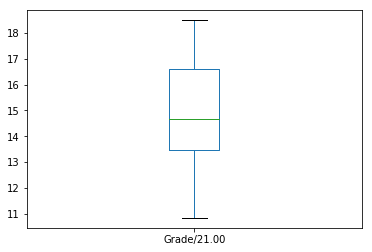

In [29]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [30]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    
    df=Q3_function(filenames, file)
    
    return list(df.shape)


# Call the function and print the results
rows, columns = Q9_function(file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [31]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    
    values = df.groupby('Q.5/12.00').id.unique()
    return values[min(df['Q.5/12.00'])],len(values[max(df['Q.5/12.00'])])


# Call the function and print the results
zero, maximum = Q10_function(Q6_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [9 10 13 17 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [32]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    
    tuples_df = Q3_function(filenames, s = "Tuples")
    taxonomy_df = Q3_function(filenames, s = "Taxonomy")
    
    a,tuples_df = Q5_function(tuples_df)
    a,taxonomy_df = Q5_function(taxonomy_df)
    
    new_df = pd.merge(tuples_df,taxonomy_df,on="id", how='inner')
    new_df['Total_score'] = new_df['Grade/20.00'] + new_df['Grade/21.00']
    
    return new_df,new_df.set_index(['id'])['Total_score'].idxmax()


# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [33]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """  
    
    return sorted(list(df[df['time_x'] + df['time_y']<1200]['id']))


# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _Include the overall average in the groupings._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* Don't consider 'Overall Average' row.

In [34]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    
    df['bins'] = pd.cut(df['Grade/45.00'], 5)
    
    df = df[:-1].groupby('bins').id.unique()
    
    return df


# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

bins
(12.981, 16.8]           [15, 16, 17, 18]
(16.8, 20.6]                 [12, 13, 14]
(20.6, 24.4]      [5, 6, 7, 8, 9, 10, 11]
(24.4, 28.2]                       [3, 4]
(28.2, 32.0]                    [0, 1, 2]
Name: id, dtype: object


### This section performs unit testing to check correctness of code.

In [35]:
import unittest

class TestNotebook(unittest.TestCase):
    
    def test_Q01_function(self):
        
        filenames = Q1_function()
        self.assertEqual(len(filenames), 11)
        
        
    def test_Q02_function(self):
        
        ans='Python-QUIZ Dictionaries (10 min.)-grades.xlsx'
        
        file = Q2_function(filenames, s = "Dictionaries")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,file.split("/")[-1].split("\\")[-1])

        
    def test_Q03_function(self):
        
        functions_df = Q3_function(filenames, s = "Functions")
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        count = 24
        sum_grade45 = 525
        
        self.assertEqual(cols_ans,list(functions_df))
        self.assertEqual(count,len(functions_df))
        self.assertEqual(sum_grade45,functions_df['Grade/45.00'].sum())
        
        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        names, df_subset, top_10 = Q4_function(functions_df)

        self.assertEqual(cols_ans,list(names))
        self.assertEqual(subset_cols_ans,list(df_subset))
        self.assertEqual(top_ans,len(top_10))
        
    
    def test_Q05_function(self):
        
        cols_ans=['id', 'Grade/45.00', 'Q.1/5.00', 'Q.2/10.00', 'Q.3/6.00', 'Q.4/6.00', 'Q.5/12.00', 'Q.6/6.00',  'time']
        column_types, Q5_df = Q5_function(df_subset)
        self.assertEqual(cols_ans,list(Q5_df))
        
    
    def test_Q06_function(self):
        
        values = [21.63157894736842, 4.315789473684211, 5.368421052631579, 4.894736842105263, 1.5789473684210527,\
                     4.842105263157895, 0.631578947368421, 1125.3684210526317]
        
        Q6_df = Q6_function(Q5_df)
        self.assertEqual(values,list(Q6_df.iloc[-1,1:]))
        
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result = Q7_function(file="Exceptions")
        self.assertEqual(ans, result)

    
    def test_Q08_function(self):
        pass
    
    
    def test_Q09_function(self):
        
        rows, columns = Q9_function(file='Strings')
        self.assertEqual(rows, 17)
        self.assertEqual(columns, 7)
        
        
    def test_Q10_function(self):
        
        zero, maximum = Q10_function(Q6_df)
        self.assertEqual(list(zero), [9, 10, 13, 17, 18])
        self.assertEqual(maximum, 2)
        
        
    def test_Q11_function(self):
        
        total_score = [32, 39, 37, 37, 41, 39, 38, 39, 37, 33, 27, 32, 31, 24]
        Q11_df, max_scorer = Q11_function()
        self.assertEqual(list(Q11_df['Total_score']), total_score)
        self.assertEqual(max_scorer, 10)
    
        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        ids = Q12_function(Q11_df)
        self.assertEqual(ans, ids)
        
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        Q13_df = Q13_function(Q6_df)
        result = [Q13_df.iloc[x] for x in range(len(Q13_df))]
        
        for x in range(len(ans)):
            self.assertEqual(sum(result[x]), sum(ans[x]))

  
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q01_function (__main__.TestNotebook) ... ok
test_Q02_function (__main__.TestNotebook) ... ok
test_Q03_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q05_function (__main__.TestNotebook) ... ok
test_Q06_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... ok
test_Q08_function (__main__.TestNotebook) ... ok
test_Q09_function (__main__.TestNotebook) ... ok
test_Q10_function (__main__.TestNotebook) ... ok
test_Q11_function (__main__.TestNotebook) ... ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 13 tests in 0.140s

OK
